In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset (replace filename if necessary)
df = pd.read_csv(next(iter(uploaded)))

# Set seaborn style
sns.set(style="whitegrid")

# Preview data
df.head()



Saving mobile_addiction_cleaned.csv to mobile_addiction_cleaned (2).csv


,Entry number,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,0,2,29,0,0,49,0,44,5,3,35,not addicted
1,1,6,29,1,2,65,1,29,5,9,21,addicted
2,2,9,28,2,0,57,3,28,7,5,39,addicted
3,3,6,39,2,0,69,1,28,6,8,24,addicted
4,4,5,37,3,1,64,2,27,4,5,26,addicted


**Histogram of Daily Screen Time**

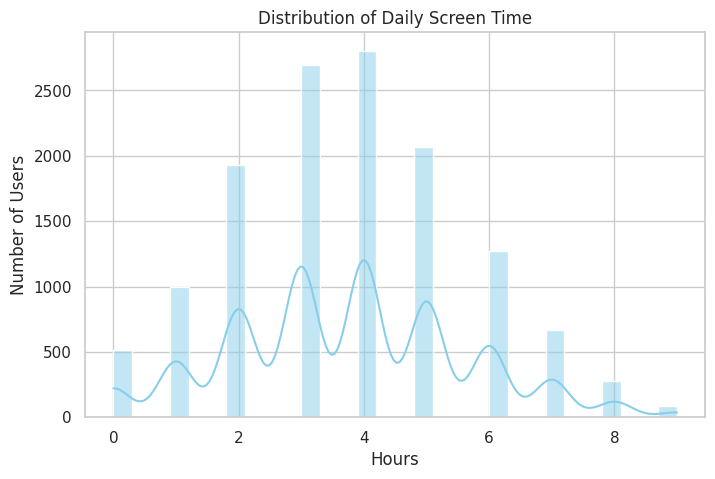

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['daily_screen_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Hours')
plt.ylabel('Number of Users')
plt.show()


**Line Plot: Daily Screen Time Over First 100 Entries**





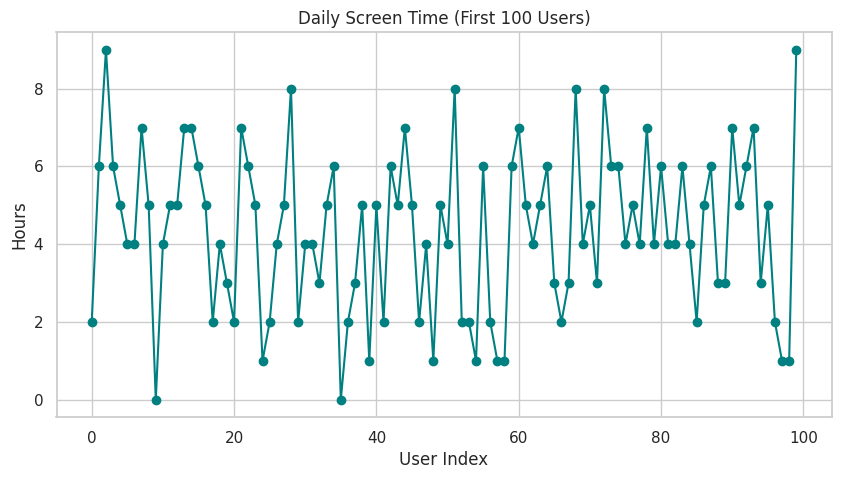

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df['daily_screen_time'][:100], marker='o', linestyle='-', color='teal')
plt.title('Daily Screen Time (First 100 Users)')
plt.xlabel('User Index')
plt.ylabel('Hours')
plt.grid(True)
plt.show()


**Scatter Plot: Notifications vs. Stress Level**


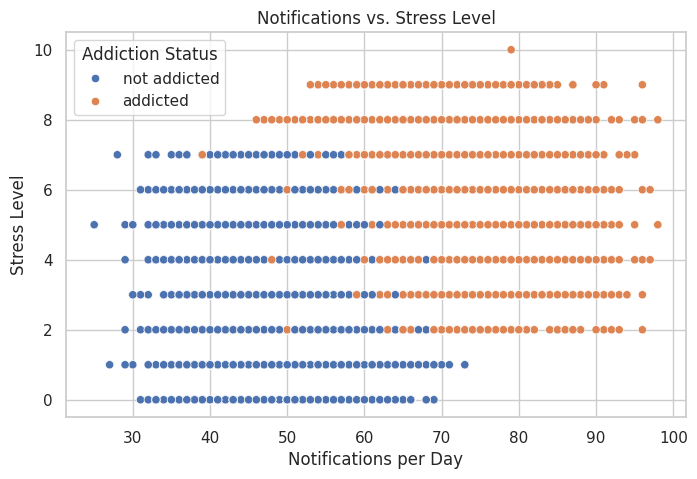

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='notifications', y='stress_level', hue='addicted', data=df)
plt.title('Notifications vs. Stress Level')
plt.xlabel('Notifications per Day')
plt.ylabel('Stress Level')
plt.legend(title='Addiction Status')
plt.show()


**correlation matrix**


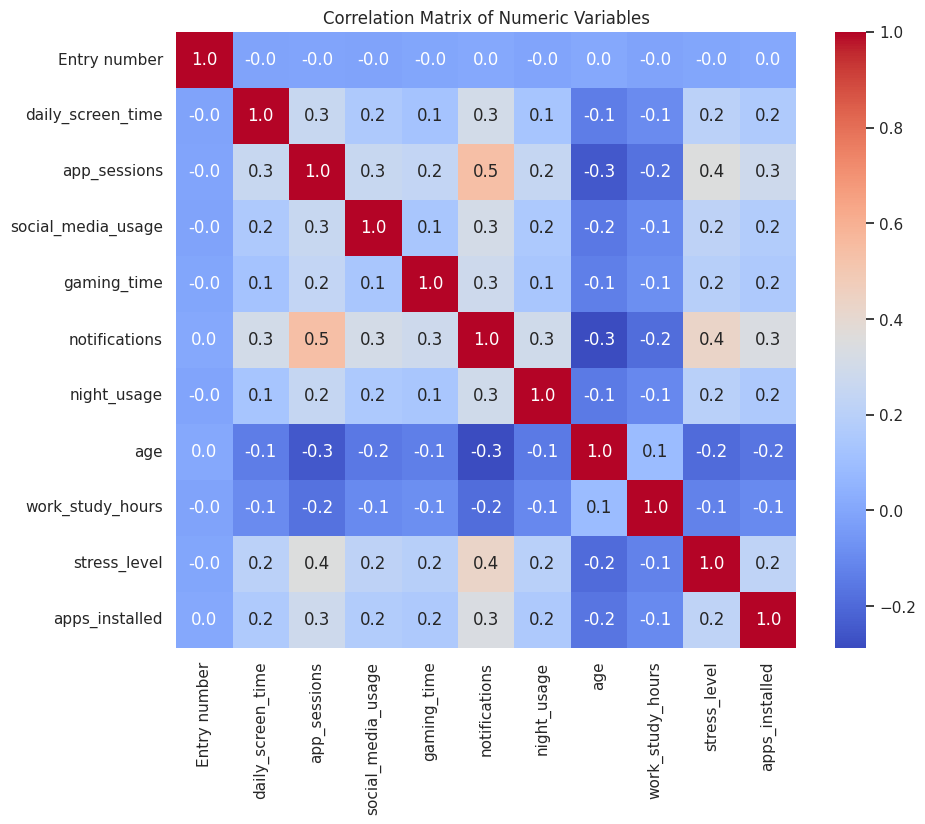

In [8]:
plt.figure(figsize=(10, 8))

# Only include numeric columns
numeric_df = df.select_dtypes(include='number')  # or df.drop(columns=['Entry number', 'addicted'])
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



**Bar Plot: Average Social Media Usage by Addiction Status**

<ipython-input-16-4301e0a17c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='addicted', y='social_media_usage', data=avg_social, palette='Set2')


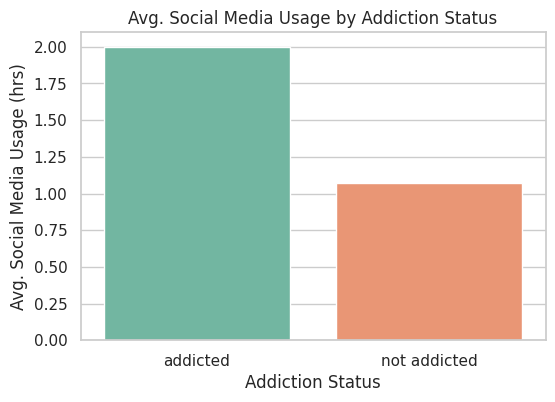

In [16]:
avg_social = df.groupby('addicted')['social_media_usage'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='addicted', y='social_media_usage', data=avg_social, palette='Set2')
plt.title('Avg. Social Media Usage by Addiction Status')
plt.xlabel('Addiction Status')
plt.ylabel('Avg. Social Media Usage (hrs)')
plt.show()

**Pie Chart: Addiction Class Distribution**

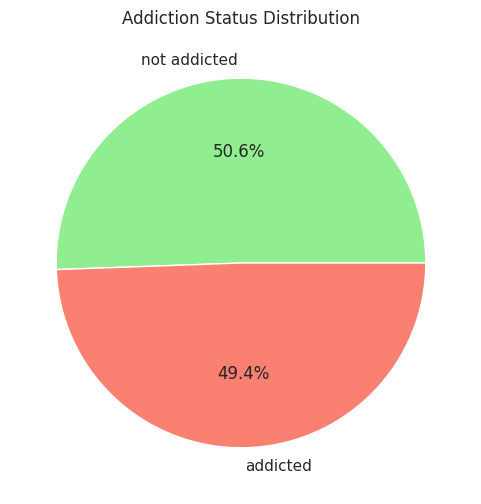

In [17]:
plt.figure(figsize=(6, 6))
addiction_counts = df['addicted'].value_counts()
plt.pie(addiction_counts, labels=addiction_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Addiction Status Distribution')
plt.show()



**Scatter Plot:Apps Installed vs. Social Media Usage**

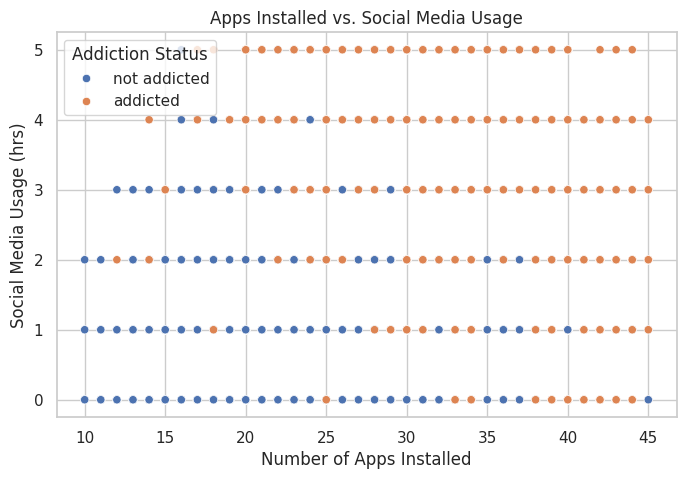

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='apps_installed', y='social_media_usage', hue='addicted')
plt.title('Apps Installed vs. Social Media Usage')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Social Media Usage (hrs)')
plt.legend(title='Addiction Status')
plt.show()


** Bar plot: average work/study hours between users who are "addicted" vs. "not addicted".**

<ipython-input-19-aa9425b9b556>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_work, x='addicted', y='work_study_hours', palette='pastel')


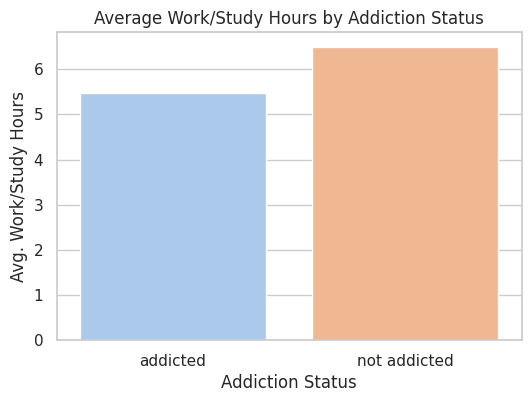

In [19]:
avg_work = df.groupby('addicted')['work_study_hours'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_work, x='addicted', y='work_study_hours', palette='pastel')
plt.title('Average Work/Study Hours by Addiction Status')
plt.xlabel('Addiction Status')
plt.ylabel('Avg. Work/Study Hours')
plt.show()
